In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read csv data
census = pd.read_csv("Census.csv")

In [3]:
#Taking a look at how the data looks like
census.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [4]:
census.keys()

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [5]:
df_num = census['No of hours']

In [6]:
df_num.describe()

count    267419.000000
mean         35.234789
std          13.520881
min           1.000000
25%          27.000000
50%          37.000000
75%          45.000000
max          60.000000
Name: No of hours, dtype: float64

In [7]:
census.shape

(569740, 19)

In [8]:
#Make a copy of the original data to start data pre-processing. In case something goes wrong re-reading the file will not be needed
census1 = census.copy()
census1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [9]:
rt_mapping = {
    'C' : 'Communal',
    'H' : 'Non-Communal'
}
census1['Residence Type'] = census1['Residence Type'].replace(rt_mapping)
fc_mapping = {
    1 : 'None',
    2 : 'Married',
    3 : 'Cohabiting',
    4 : 'Lone Male',
    5 : 'Lone Female',
    6 : 'Other',
    -9 : 'No code required'
}
census1['Family Composition'] = census1['Family Composition'].replace(fc_mapping)

pb_mapping = {
    1 : 'Usual resident',
    2 : 'Student',
    3 : 'Short-term'
}
census1['Population Base'] = census1['Population Base'].replace(pb_mapping)

ms_mapping = {
    1 : 'Single',
    2 : 'Married',
    3 : 'Seperate',
    4 : 'Divorced',
    5 : 'Widowed'
}

census1['Marital Status'] = census1['Marital Status'].replace(ms_mapping)


s = {
    1 : 'Yes',
    2 : 'No'
}

census1['Student'] = census1['Student'].replace(s)

cob = {
    1 : 'UK',
    2 : 'Non-UK',
    -9 : 'No code required'
}

census1['Country of Birth'] = census1['Country of Birth'].replace(cob)

health_mapping = {
    1: 'Very good health',
    2: 'Good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health',
    -9: 'No code required'
}

census1['Health'] = census1['Health'].replace(health_mapping)

ea = {
    1 : 'Active Employee',
    2 : 'Active Self-employed',
    3 : 'Active Unemployed',
    4 : 'Active Student',
    5 : 'Inactive Retired',
    6 : 'Inactive Student',
    7 : 'Inactive Homecare',
    8 : 'Inactive Sick',
    9 : 'Inactive Other',
    -9 : 'No code required'
}

census1['Economic Activity'] = census1['Economic Activity'].replace(ea)

o = {
    1 : 'Managers, Directors and Senior Officials',
    2 : 'Professional',
    3 : 'Associate',
    4 : 'Administrative',
    5 : 'Skilled Trades',
    6 : 'Caring, Leisure and Other Service',
    7 : 'SSales and Customer Service',
    8 : 'Process, Plant and Machine',
    9 : 'Elementary',
    -9 : 'No code required'
}

census1['Occupation'] = census1['Occupation'].replace(o)

i = {
    1 : 'Agriculture, forestry and fishing',
    2 : 'Mining and quarrying; Manufacturing; Electricity, gas, steam and air conditioning system; Water supply',
    3 : 'Construction',
    4 : 'Wholesale and retail trade; Repair of motor vehicles and motorcycles',
    5 : 'Accommodation and food service activities',
    6 : 'Transport and storage; Information and communication',
    7 : 'Financial and insurance activities; Intermediation',
    8 : 'Real estate activities; Professional, scientific and technical activities; Administrative and support service activities',
    9 : 'Public administration and defence; compulsory social security',
    10 : 'Education',
    11 : 'Human health and social work activities',
    12 : 'Other community, social and personal service activities; Private households employing domestic staff; Extra-territorial organisations and bodies',
    -9 : 'No code required'
}


Hours = {
    1 : 'Part-time: 15 or less hours worked',
    2 : 'Part-time: 16 to 30 hours worked',
    3 : 'Full-time: 31 to 48 hours worked',
    4 : 'Full-time: 49 or more hours worked',
    -9 : 'No code required'
}

census1['Industry'] = census1['Industry'].replace(i)
census1['Hours worked per week'] = census1['Hours worked per week'].replace(Hours)
sg = {
    1 : 'AB: Higher & intermediate managerial, administrative',
    2 : 'C1: Supervisory, clerical & junior managerial, administrative',
    3 : 'C2: Skilled manual occupations',
    4 : 'DE: Semi-skilled & unskilled manual occupations, Unemployed',
    -9 : 'No code required'
}

census1['Approximated Social Grade'] = census1['Approximated Social Grade'].replace(sg)

region_mapping = {
    'E12000001': 'North East',
    'E12000002': 'North West',
    'E12000003': 'Yorkshire and the Humber',
    'E12000004': 'East Midlands',
    'E12000005': 'West Midlands',
    'E12000006': 'East of England',
    'E12000007': 'London',
    'E12000008': 'South East',
    'E12000009': 'South West',
    'W92000004': 'Wales'
}
sex_mapping = {
    1: 'Male',
    2: 'Female'
}

age_mapping = {
    1: '0 to 15',
    2: '16 to 24',
    3: '25 to 34',
    4: '35 to 44',
    5: '45 to 54',
    6: '55 to 64',
    7: '65 to 74',
    8: '75 and over'
}

religion_mapping = {
    1: 'No religion',
    2: 'Christian',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Jewish',
    6: 'Muslim',
    7: 'Sikh',
    8: 'Other religion',
    9: 'Not stated',
    -9: 'No code required'
}

eg_mapping = {
    1: 'White',
    2: 'Mixed',
    3: 'Asian and Asian British',
    4: 'Black or Black British',
    5: 'Chinese or Other ethnic group',
    -9: 'No code required'
}

census1['Ethnic Group'] = census1['Ethnic Group'].replace(eg_mapping)
census1['Religion'] = census1['Religion'].replace(religion_mapping)
census1['Age'] = census1['Age'].replace(age_mapping)
census1['Sex'] = census1['Sex'].replace(sex_mapping)
census1['Region'] = census1['Region'].replace(region_mapping)


In [10]:
census1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,North East,Non-Communal,Married,Usual resident,Female,55 to 64,Married,No,UK,Good health,White,Christian,Inactive Retired,"Process, Plant and Machine",Mining and quarrying; Manufacturing; Electrici...,No code required,NaN,DE: Semi-skilled & unskilled manual occupation...
1,7394832,North East,Non-Communal,Cohabiting,Usual resident,Female,0 to 15,Single,No,UK,Good health,White,No religion,No code required,No code required,No code required,No code required,NaN,No code required
2,7394719,North East,Non-Communal,Married,Usual resident,Male,65 to 74,Married,No,UK,Very good health,White,Christian,Inactive Retired,"Process, Plant and Machine",Mining and quarrying; Manufacturing; Electrici...,No code required,NaN,"C1: Supervisory, clerical & junior managerial,..."
3,7394840,North East,Non-Communal,None,Usual resident,Female,55 to 64,Divorced,No,UK,Fair health,White,Christian,Inactive Retired,Elementary,Accommodation and food service activities,No code required,NaN,DE: Semi-skilled & unskilled manual occupation...
4,7394711,North East,Non-Communal,Married,Usual resident,Male,0 to 15,Single,Yes,UK,Very good health,White,No religion,No code required,No code required,No code required,No code required,NaN,No code required


In [11]:
df_cat = census1.drop(['Person ID', 'No of hours'], axis=1)

In [12]:
for column in df_cat.columns:
    print(f"Column: {column}")
    print("Number of unique values:", df_cat[column].nunique())
    print("Unique values:")
    print(df_cat[column].value_counts())
    print("\n")

Column: Region
Number of unique values: 10
Unique values:
South East                  88084
London                      83582
North West                  71436
East of England             59411
West Midlands               56875
South West                  53774
Yorkshire and the Humber    53471
East Midlands               45782
Wales                       30976
North East                  26349
Name: Region, dtype: int64


Column: Residence Type
Number of unique values: 2
Unique values:
Non-Communal    559086
Communal         10654
Name: Residence Type, dtype: int64


Column: Family Composition
Number of unique values: 7
Unique values:
Married             300961
None                 96690
Cohabiting           72641
Lone Female          64519
No code required     18851
Lone Male             9848
Other                 6230
Name: Family Composition, dtype: int64


Column: Population Base
Number of unique values: 3
Unique values:
Usual resident    561039
Student             6730
Short-term

In [13]:
census1.isnull().sum()

Person ID                         0
Region                            0
Residence Type                    0
Family Composition                0
Population Base                   0
Sex                               0
Age                               0
Marital Status                    0
Student                           0
Country of Birth                  0
Health                            0
Ethnic Group                      0
Religion                          0
Economic Activity                 0
Occupation                        0
Industry                          0
Hours worked per week             0
No of hours                  302321
Approximated Social Grade         0
dtype: int64

In [14]:
basic_stats = census1.describe()
median = census1.median()
mode = census1.mode().iloc[0]
basic_stats.loc['median'] = median
basic_stats.loc['mode'] = mode
basic_stats

C:\Users\nadon\AppData\Local\Temp\ipykernel_19684\307137706.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = census1.median()


,Person ID,No of hours
count,5.697400e+05,267419.000000
mean,7.679353e+06,35.234789
std,1.644699e+05,13.520881
min,7.394483e+06,1.000000
25%,7.536918e+06,27.000000
50%,7.679352e+06,37.000000
75%,7.821787e+06,45.000000
max,7.964223e+06,60.000000
median,7.679352e+06,37.000000
mode,7.394483e+06,41.000000


In [15]:
census1.keys()

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [16]:
['Religion', 'Sex', 'Age', 'Ethnic Group', 'Region']

['Religion', 'Sex', 'Age', 'Ethnic Group', 'Region']

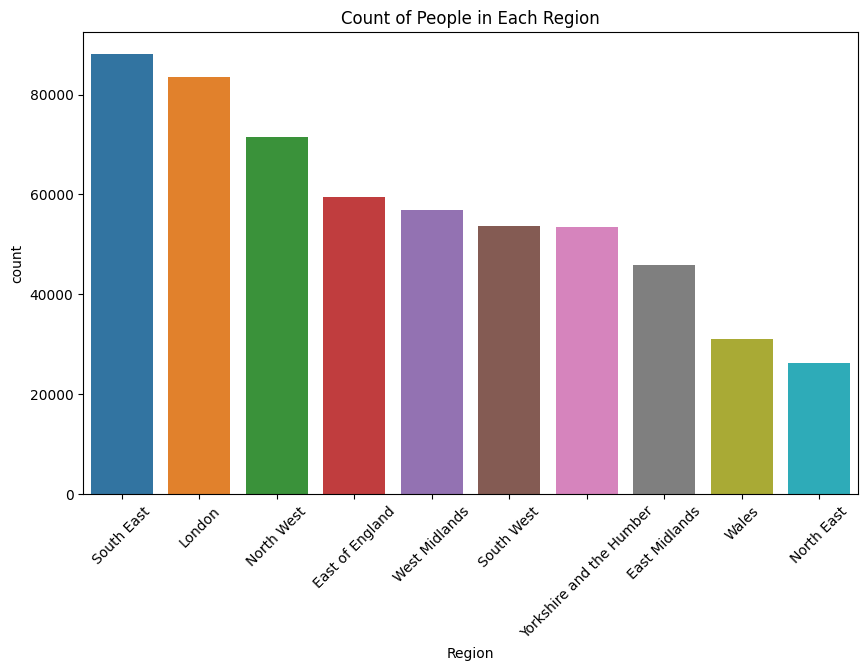

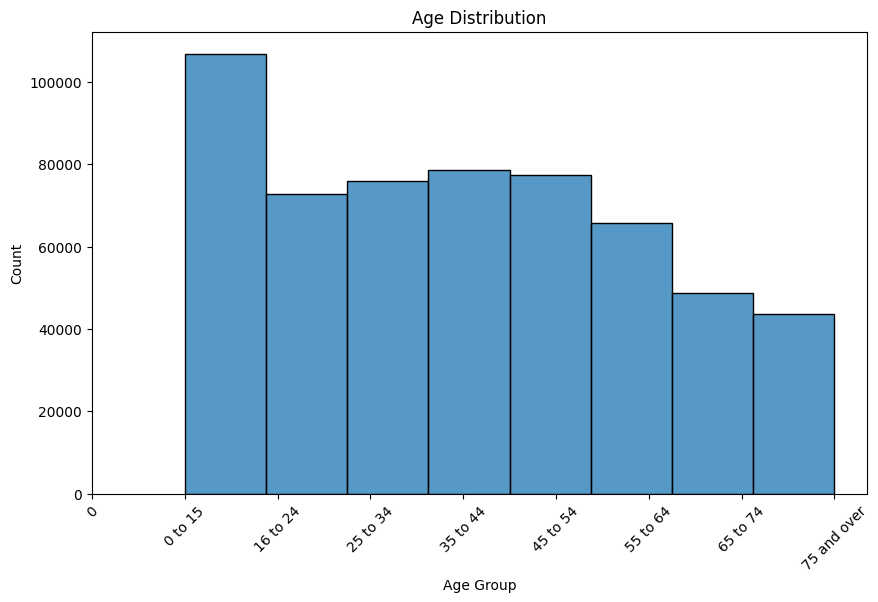

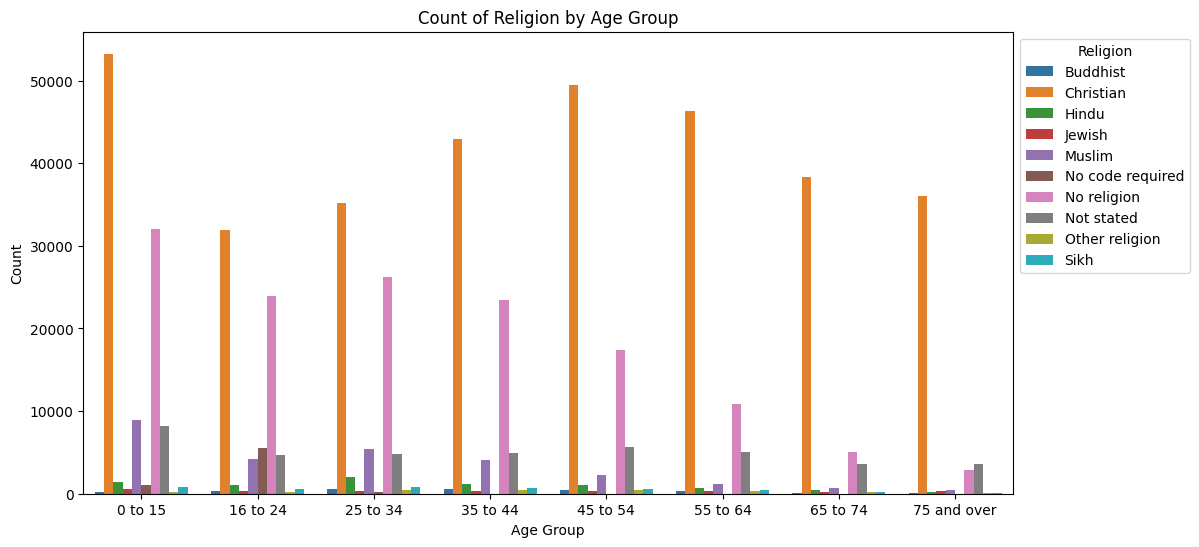

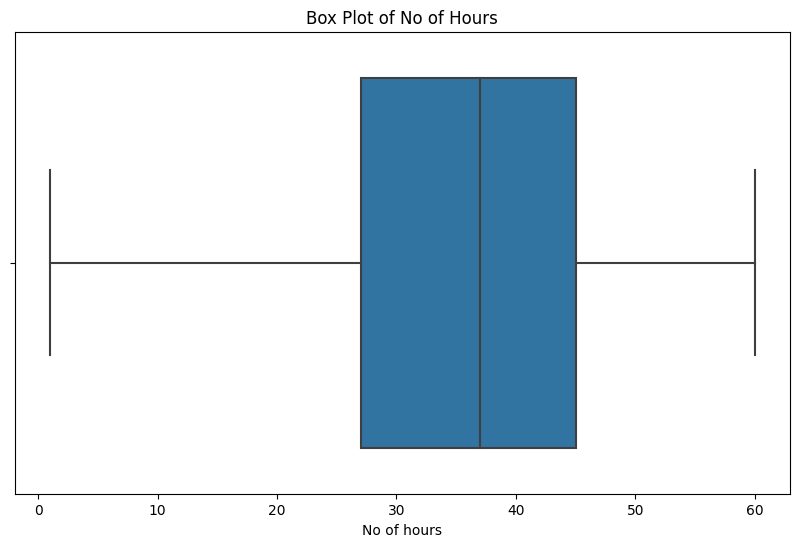

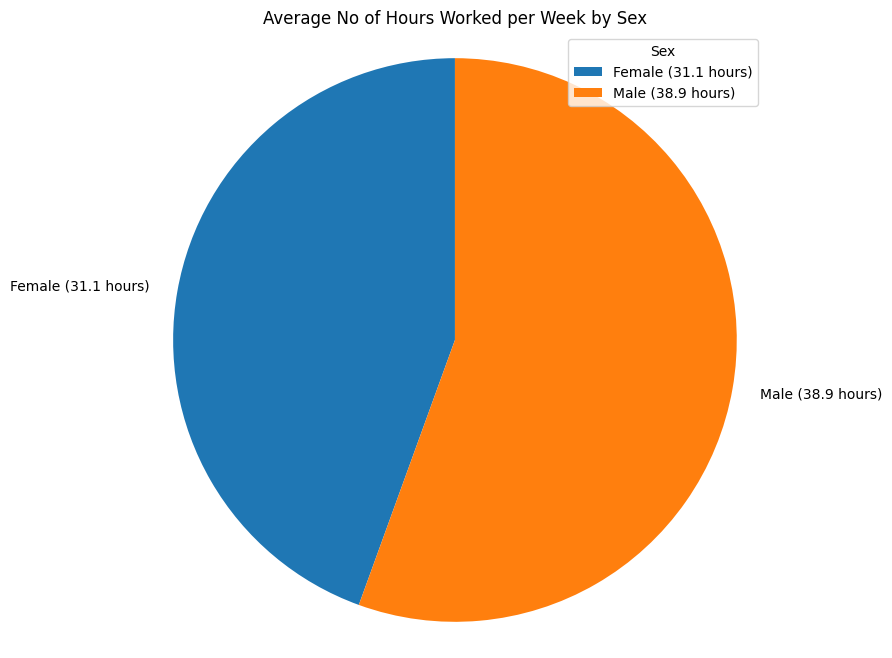

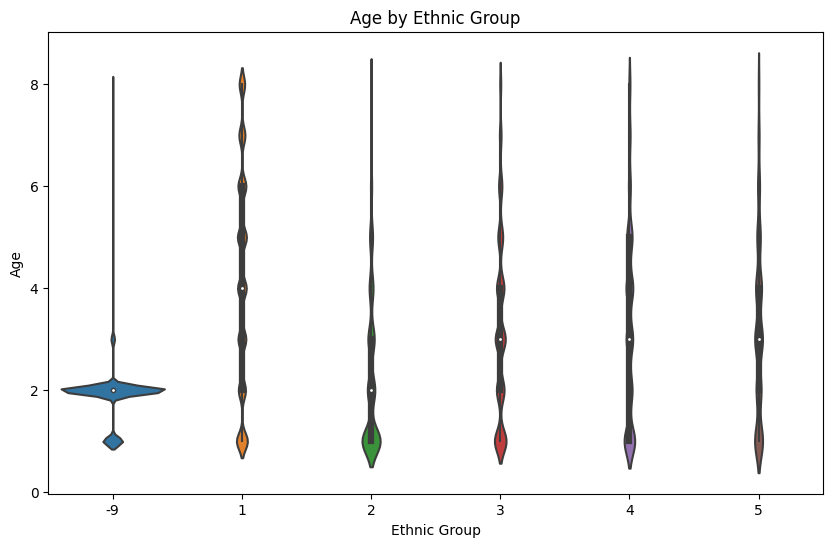

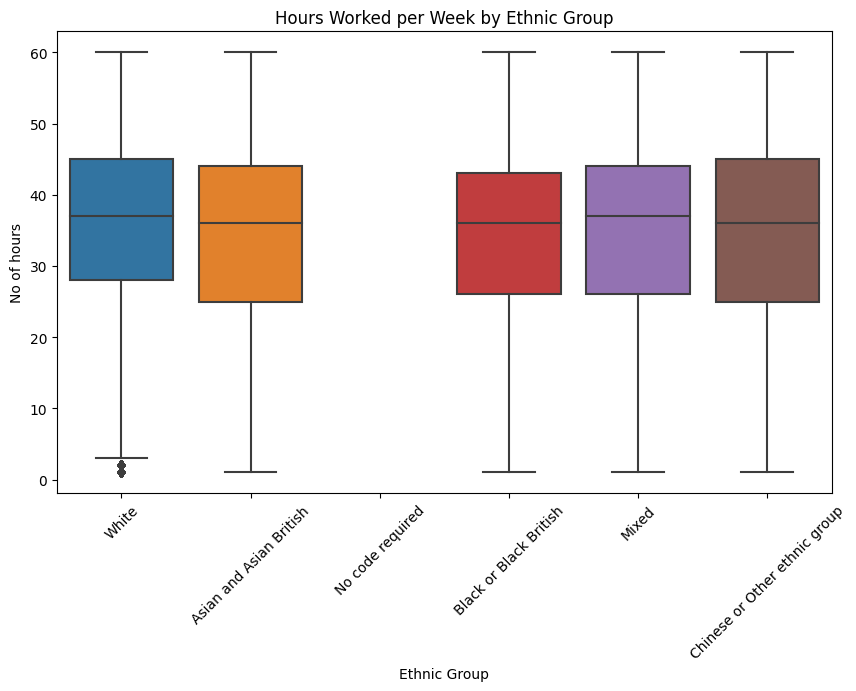

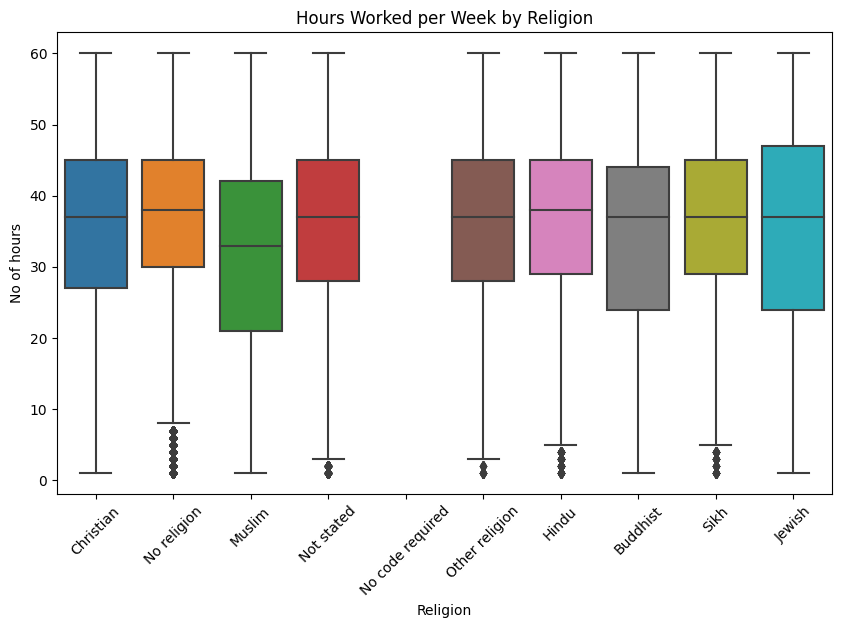

In [17]:
# Visualization 1: Countplot for 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(data=census1, order=census1['Region'].value_counts().index, x='Region')
plt.xticks(rotation=45)
plt.title('Count of People in Each Region')

# Visualization 2: Histogram for 'Age'
age_labels = ['0', '0 to 15', '16 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '65 to 74', '75 and over']
plt.figure(figsize=(10, 6))
sns.histplot(data=census, x='Age', bins=8, kde=False)
plt.xticks(range(9), age_labels, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')

# Visualization 3: Barplot for 'Religion' by 'Age'
religion_count_by_age = census1.groupby(['Age', 'Religion']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=religion_count_by_age, x='Age', y='Count', hue='Religion')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Religion by Age Group')
plt.legend(title='Religion', bbox_to_anchor=(1, 1))

# Visualization 4: Boxplot for 'Hours worked per week'
plt.figure(figsize=(10, 6))
sns.boxplot(data=census1, x='No of hours')
plt.title('Box Plot of No of Hours')

# Visualization 5: Pieplot for average working hours by Sex
average_hours_by_sex = census1.groupby('Sex')['No of hours'].mean()
plt.figure(figsize=(8, 8))
plt.pie(average_hours_by_sex, labels=[f'{sex} ({average:.1f} hours)' for sex, average in average_hours_by_sex.items()], startangle=90)
plt.legend(title='Sex', loc='upper right')
plt.title('Average No of Hours Worked per Week by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Visualization 6: Violin plot of age against ethnic group
plt.figure(figsize=(10, 6))
sns.violinplot(data=census, x='Ethnic Group', y='Age')
plt.title('Age by Ethnic Group')

# Visualization 7: Boxplot of No of hours against ethnic group
plt.figure(figsize=(10, 6))
sns.boxplot(data=census1, x='Ethnic Group', y='No of hours')
plt.xticks(rotation=45)
plt.title('Hours Worked per Week by Ethnic Group')

# Visualization 8: Boxplot of No of hours against Religion
plt.figure(figsize=(10, 6))
sns.boxplot(data=census1, x='Religion', y='No of hours')
plt.xticks(rotation=45)
plt.title('Hours Worked per Week by Religion')

# Show the plots
plt.show()


In [18]:
x1 = census1['No of hours'].dropna()

In [19]:
x1.groupby(census1['Religion']).mean()

Religion
Buddhist          34.332597
Christian         34.997413
Hindu             35.749083
Jewish            35.094963
Muslim            31.541602
No religion       36.078003
Not stated        35.455942
Other religion    35.296643
Sikh              35.583060
Name: No of hours, dtype: float64

In [20]:
x1.groupby(census1['Religion']).median()

Religion
Buddhist          37.0
Christian         37.0
Hindu             38.0
Jewish            37.0
Muslim            33.0
No religion       38.0
Not stated        37.0
Other religion    37.0
Sikh              37.0
Name: No of hours, dtype: float64

In [21]:
x1.groupby(census1['Religion']).describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Buddhist,1359.0,34.332597,14.209397,1.0,24.0,37.0,44.0,60.0
Christian,156536.0,34.997413,13.626147,1.0,27.0,37.0,45.0,60.0
Hindu,4364.0,35.749083,13.125518,1.0,29.0,38.0,45.0,60.0
Jewish,1211.0,35.094963,15.116301,1.0,24.0,37.0,47.0,60.0
Muslim,8329.0,31.541602,13.946359,1.0,21.0,33.0,42.0,60.0
No religion,73715.0,36.078003,13.135451,1.0,30.0,38.0,45.0,60.0
Not stated,18487.0,35.455942,13.573865,1.0,28.0,37.0,45.0,60.0
Other religion,1281.0,35.296643,13.550636,1.0,28.0,37.0,45.0,60.0
Sikh,2137.0,35.583060,13.046042,1.0,29.0,37.0,45.0,60.0


In [22]:
x1.groupby(census1['Ethnic Group']).describe()

,count,mean,std,min,25%,50%,75%,max
Ethnic Group,,,,,,,,
Asian and Asian British,17876.0,34.083520,13.599569,1.0,25.0,36.0,44.0,60.0
Black or Black British,7638.0,34.106049,12.985332,1.0,26.0,36.0,43.0,60.0
Chinese or Other ethnic group,2195.0,34.271982,14.226592,1.0,25.0,36.0,45.0,60.0
Mixed,3906.0,34.494112,13.778719,1.0,26.0,37.0,44.0,60.0
White,235804.0,35.379858,13.514289,1.0,28.0,37.0,45.0,60.0


In [23]:
census1.keys()

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

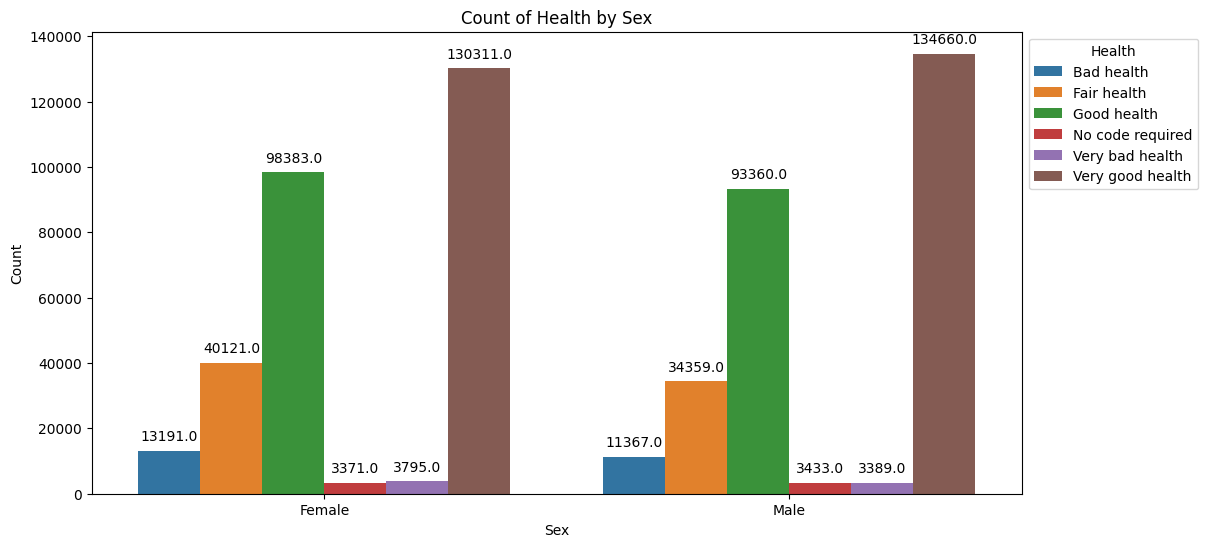

In [28]:
religion_count_by_Health = census1.groupby(['Sex', 'Health']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=religion_count_by_Health, x='Sex', y='Count', hue='Health')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Health by Sex')
plt.legend(title='Health', bbox_to_anchor=(1, 1))

plt.show()


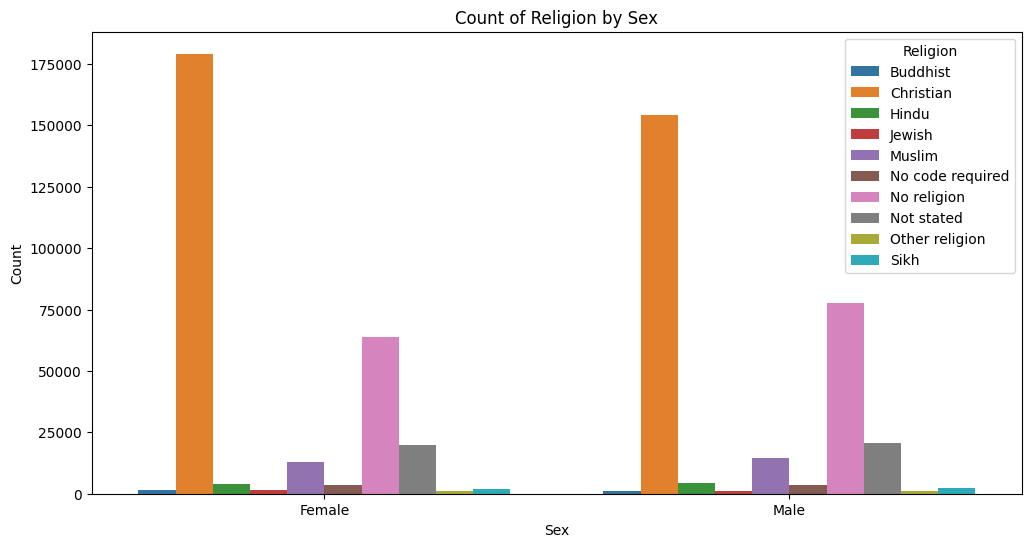

In [26]:
religion_count_by_sex = census1.groupby(['Sex', 'Religion']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=religion_count_by_sex, x='Sex', y='Count', hue='Religion')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Religion by Sex')
plt.legend(title='Religion', bbox_to_anchor=(1, 1))